## Problem Statement.

**_To build a model for HELP International humanitarian NGO to analyse which countries are in need of the provision of basic amenities and relief during any sort of calamities._**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Step 1: Reading and Visualizing the Data.

In [2]:
ngo = pd.read_csv(r"C:\Users\FS066229\OneDrive - Cerner Corporation\Documents\Python\Clustering assignment\Country-Data.csv")
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
ngo.shape

(167, 10)

In [4]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Step 2: Cleaning the data and Preparing the Data.

In [5]:
ngo.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**_Since there are no missing values we do not need the steps of imputation or removing the data._**

#### Since the values of column health, export and import are in percentage we need to convert there values to original.

In [6]:
ngo['health'] = ngo['health'] * ngo['gdpp'] / 100

In [7]:
ngo['exports'] = ngo['exports'] * ngo['gdpp'] /100
ngo['imports'] = ngo['imports'] * ngo['gdpp'] /100
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Step 3 - Exploratory Data analysis

### Univariate Analysis.

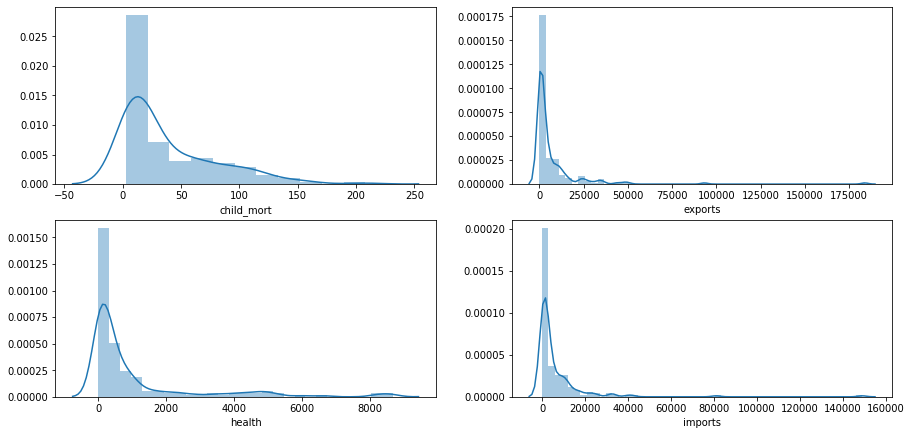

In [8]:
plots = ['child_mort','exports','health','imports']
plt.figure(figsize = (15,15))
for i in enumerate(plots):
    plt.subplot(4,2,i[0]+1)
    sns.distplot(ngo[i[1]])

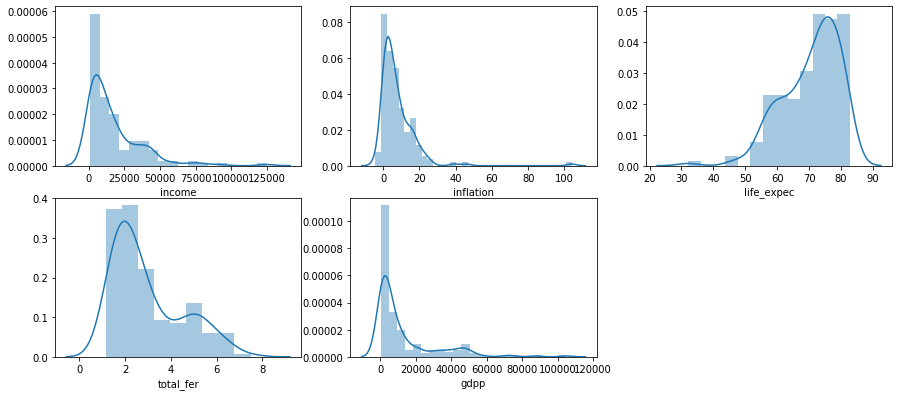

In [9]:
plots1 = ['income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (15,17))
for i in enumerate(plots1):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(ngo[i[1]])

**_From the above plots it shows that the columns are not in normal distribution and we can see a pattern in all the plots, it can be interpreted that the columns with child mortality rate, total health capita, income per person, inflation rate of the country, life expectancy, total fertility and GDP per captia have more information and will be helpful in analyzing as to which countries are in need of the ngo's help, as we can observe a pattern in all these columns and are not in a normal distribution._**

In [10]:
corr1 = ngo[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].corr()
corr1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


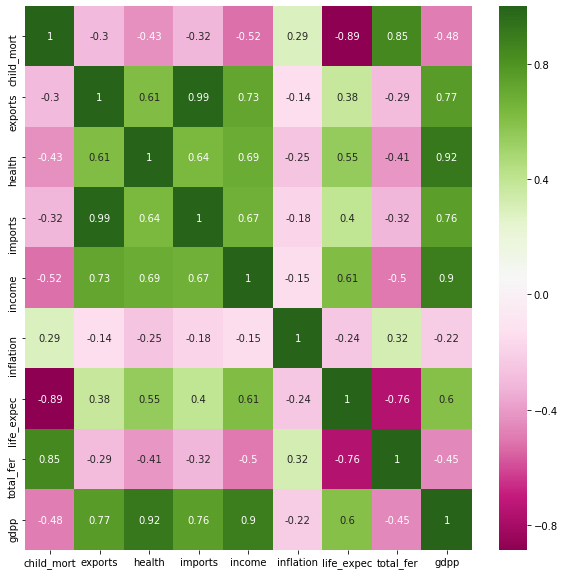

In [11]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr1, annot = True, cmap = 'PiYG')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

**_From the above correlation matrix we can make out that there are few columns which are highly correlated like total_fer and child_mort which have value of 0.85 and few of them have a negative correlation as well._**

### Checking for outliers.

**_Using the capping method for the treatment of outliers._**

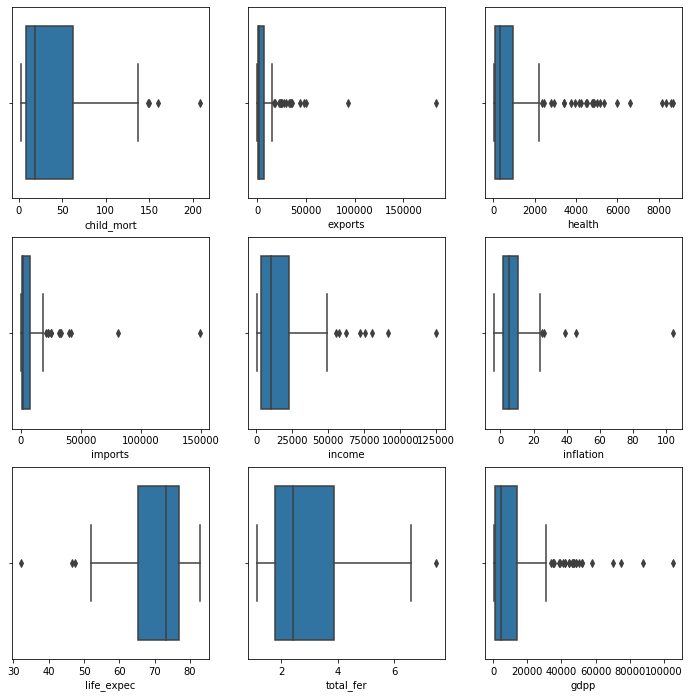

In [12]:
plt.figure(figsize =(12,12))
plt.subplot(3,3,1)
sns.boxplot(ngo['child_mort'])

plt.subplot(3,3,2)
sns.boxplot(ngo['exports'])

plt.subplot(3,3,3)
sns.boxplot(ngo['health'])

plt.subplot(3,3,4)
sns.boxplot(ngo['imports'])

plt.subplot(3,3,5)
sns.boxplot(ngo['income'])

plt.subplot(3,3,6)
sns.boxplot(ngo['inflation'])

plt.subplot(3,3,7)
sns.boxplot(ngo['life_expec'])

plt.subplot(3,3,8)
sns.boxplot(ngo['total_fer'])

plt.subplot(3,3,9)
sns.boxplot(ngo['gdpp'])

**_From the above outlier identification we can see that child mortality have less number of outliers hence capping to upper limit value._**

In [13]:
ngo.child_mort.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
90%      100.220000
95%      116.000000
max      208.000000
Name: child_mort, dtype: float64

Correcting the outliers by imputing the 95 percentile value.

In [14]:
ngo['child_mort'] = np.where(ngo['child_mort'] > 116, 116, ngo['child_mort'])

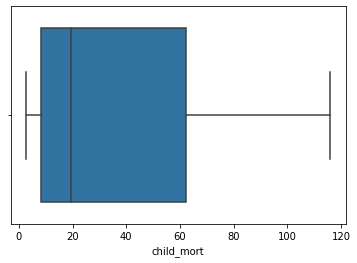

In [15]:
sns.boxplot(ngo['child_mort'])

**_As we can observe from the boxplot there are more outliers present in the columns 'exports', 'health','imports', 'income' and 'gdpp' hence we will leave the outliers as it is._**

**_As we can observe from the boxplot there are less outliers present in the column 'inflation' hence checking the percentile value of the column._**

In [16]:
ngo.inflation.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
90%       16.640000
95%       20.870000
max      104.000000
Name: inflation, dtype: float64

In [17]:
ngo['inflation'] = np.where(ngo['inflation'] > 20.87, 20.87, ngo['inflation'])

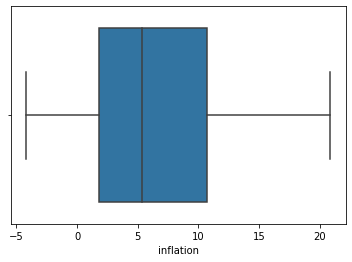

In [18]:
sns.boxplot(ngo['inflation'])

**_As we can observe from the boxplot there are outliers present in the column 'life_expec' hence checking the percentile value of the column._**

In [20]:
ngo.life_expec.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

count    167.000000
mean      70.555689
std        8.893172
min       32.100000
25%       65.300000
50%       73.100000
75%       76.800000
90%       80.400000
95%       81.400000
max       82.800000
Name: life_expec, dtype: float64

In [21]:
ngo['life_expec'] = np.where(ngo['life_expec'] < 73.1, 73.1, ngo['life_expec'])
ngo['life_expec'] = np.where(ngo['life_expec'] > 81.40, 81.40, ngo['life_expec'])

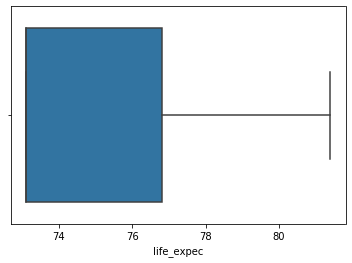

In [22]:
sns.boxplot(ngo['life_expec'])

**_As we can observe from the boxplot there are less outliers present in the column 'total_fer' hence checking the percentile value of the column._**

In [24]:
ngo.total_fer.describe(percentiles = [0.25,0.50,0.75,0.90,0.95])

count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
90%        5.322000
95%        5.861000
max        7.490000
Name: total_fer, dtype: float64

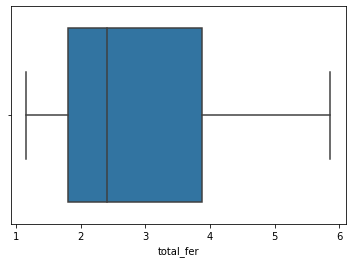

In [25]:
ngo['total_fer'] = np.where(ngo['total_fer'] > 5.861, 5.861, ngo['total_fer'])
sns.boxplot(ngo['total_fer'])

In [26]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,73.1,5.820,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.650,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.890,4460
3,Angola,116.0,2199.19,100.6050,1514.370,5900,20.87,73.1,5.861,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.130,12200


## Step 3 - Preparing for modelling.

In [27]:
new = ngo[['gdpp','child_mort','income','exports','health','imports','inflation','life_expec','total_fer']]
new.head()

,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
0,553,90.2,1610,55.30,41.9174,248.297,9.44,73.1,5.820
1,4090,16.6,9930,1145.20,267.8950,1987.740,4.49,76.3,1.650
2,4460,27.3,12900,1712.64,185.9820,1400.440,16.10,76.5,2.890
3,3530,116.0,5900,2199.19,100.6050,1514.370,20.87,73.1,5.861
4,12200,10.3,19100,5551.00,735.6600,7185.800,1.44,76.8,2.130


### Rescaling

**_Variable transformation is done to normalize the data set so that the data used in the model are all in one unit, hence we have used Standard Scaler for variable transformation._**

In [28]:
scaler = StandardScaler()

# fit_transform
scaledf = scaler.fit_transform(new)

In [30]:
scaledf = pd.DataFrame(scaledf)
scaledf.columns = ['gdpp','child_mort','income','exports','health','income','inflation','life_expec','total_fer']
scaledf.head()

,gdpp,child_mort,income,exports,health,income,inflation,life_expec,total_fer
0,-0.679180,1.479341,-0.808245,-0.411011,-0.565040,-0.432276,0.394438,-0.754360,2.016421
1,-0.485623,-0.559029,-0.375369,-0.350191,-0.439218,-0.313677,-0.383226,0.337246,-0.880535
2,-0.465376,-0.262690,-0.220844,-0.318526,-0.484826,-0.353720,1.440750,0.405471,-0.019090
3,-0.516268,2.193878,-0.585043,-0.291375,-0.532363,-0.345953,2.190136,-0.754360,2.044904
4,-0.041817,-0.733509,0.101732,-0.104331,-0.178771,0.040735,-0.862393,0.507809,-0.547072


### Hopkins Score.

In [31]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
# #Using the Hopkins Statistic function by passing the above dataframe as a parameter.
hopkins(scaledf)

0.9064374565189199

**_As hopkins score indicates the cluster tendency we know that:_**
1. If the value is between {0.01, ...,0.3}, the data is regularly spaced.
2. If the value is around 0.5, it is random.
3. If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

**_Since the value of hopkins score is 0.9064 it indicates that the model has a high tendency to cluster._**

## Step 4 - Modelling

### Kmeans Clustering.
**_Kmeans algorithm identifies K number of centroids and then allocates every data point to the nearest cluster while keeping the centroid as small as possible, the means in Kmeans refers to the averaging the data._**
**_The steps involved in Kmeans clustering are:_**
1. Asssignment step
2. Optimization step

In [32]:
# K means with some arbitrary K.
kmeans = KMeans(n_clusters = 4, max_iter = 50)

In [33]:
kmeans.fit(scaledf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
len(kmeans.labels_)

167

### Finding optimal number of clusters.

#### Elbow Curve Method - This method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.

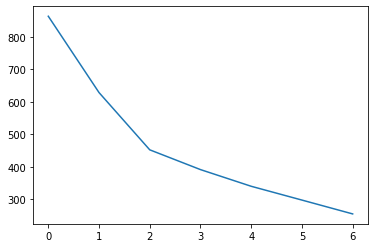

In [35]:
# defining the range.
ssd = []
range_c = [2,3,4,5,6,7,8]
for num in range_c:
    kmeans = KMeans(n_clusters = num, max_iter = 50)
    kmeans.fit(scaledf)
    
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

**_As we can observe from the above plot that it comes out as an elbow curve and there is a good infliction in the curve it indicates that the underlying model fits good at this point, and as per the curve the optimal number of clusters is 2 but we choose 3 clusters as it will help in better division of the countries._**

#### Silhouette analysis.

In [36]:
rangec = [2,3,4,5,6,7,8]
for num in rangec:
    kmeans = KMeans(n_clusters = num, max_iter = 50)
    kmeans.fit(scaledf)
    cluster_labels = kmeans.labels_
    ss = silhouette_score(scaledf, cluster_labels)
    print('For n_clusters = {0}, the ss is {1}'.format (num, ss))

For n_clusters = 2, the ss is 0.5017760422707541
For n_clusters = 3, the ss is 0.3875206483017557
For n_clusters = 4, the ss is 0.3972172590639472
For n_clusters = 5, the ss is 0.30510610688485645
For n_clusters = 6, the ss is 0.3096335879369329
For n_clusters = 7, the ss is 0.319104019833254
For n_clusters = 8, the ss is 0.31476769446903646


**_The silhouette analysis is done to display the the measure of how close each point in one cluster is to points in neighbouring clusters and therefore it helps us to determine the optimal number of clusters in a model._**
**_From the above silhoutte analysis we can make out that the optimal cluster number should be 3 as the max value of silhoutte score is 0.501 which indicates that the clusters to be taken should be 2, but preparing a model with 3 clusters will be the correct choice since we can assess the countries based on developed, developing and under developed, hence the optimal k value should be 3._**

### Final model with k = 3.

In [37]:
kmeans = KMeans(n_clusters = 3, max_iter = 5)
kmeans.fit(scaledf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=5,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [39]:
# assigning the label.
new['cluster_id'] = kmeans.labels_
new.head()

,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer,cluster_id
0,553,90.2,1610,55.30,41.9174,248.297,9.44,73.1,5.820,0
1,4090,16.6,9930,1145.20,267.8950,1987.740,4.49,76.3,1.650,2
2,4460,27.3,12900,1712.64,185.9820,1400.440,16.10,76.5,2.890,2
3,3530,116.0,5900,2199.19,100.6050,1514.370,20.87,73.1,5.861,0
4,12200,10.3,19100,5551.00,735.6600,7185.800,1.44,76.8,2.130,2


In [73]:
new['cluster_id'].value_counts()

2    89
0    45
1    33
Name: cluster_id, dtype: int64

In [40]:
country = ngo[['country']]
country.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [41]:
new1 = pd.concat([country,new], axis = 1)
new1.head()

,country,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer,cluster_id
0,Afghanistan,553,90.2,1610,55.30,41.9174,248.297,9.44,73.1,5.820,0
1,Albania,4090,16.6,9930,1145.20,267.8950,1987.740,4.49,76.3,1.650,2
2,Algeria,4460,27.3,12900,1712.64,185.9820,1400.440,16.10,76.5,2.890,2
3,Angola,3530,116.0,5900,2199.19,100.6050,1514.370,20.87,73.1,5.861,0
4,Antigua and Barbuda,12200,10.3,19100,5551.00,735.6600,7185.800,1.44,76.8,2.130,2


Text(0.5, 1.0, 'Clusters presenting GDP per capita')

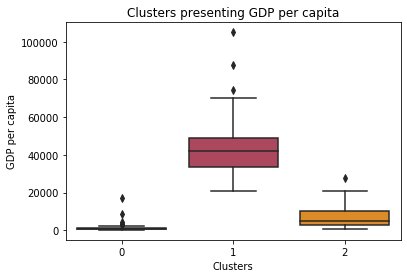

In [42]:
sns.boxplot(x = 'cluster_id',y = 'gdpp', data = new1, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('GDP per capita')
plt.title('Clusters presenting GDP per capita')

**_As we can observe from the above plot that cluster 1 represents the countries with higher GDP per capita and can be considered as the cluster of developed countries and cluster 0 represents the countries with very low GDP per capita which can be considered as the cluster of under-developed countries, and the cluster 2 can be considered as developing countries hence the countries falling under cluster 0 needs to aid._**

Text(0.5, 1.0, 'Clusters presenting Child Mortality Rate')

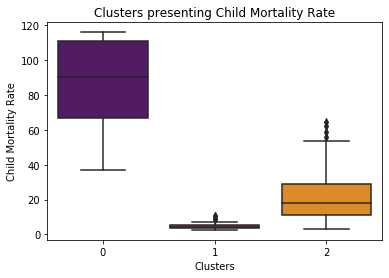

In [43]:
sns.boxplot(x = 'cluster_id', y = 'child_mort', data = new1, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('Child Mortality Rate')
plt.title('Clusters presenting Child Mortality Rate')

**_From the above plot is can be observed that the child mortality rate in cluster 1 is least which indicates that they have the amenities to help the citizens during any kind of calamities, whereas the countries falling under cluster 0 requires help in terms of reducing their child mortality rate._**

Text(0.5, 1.0, 'Clusters presenting Income per person')

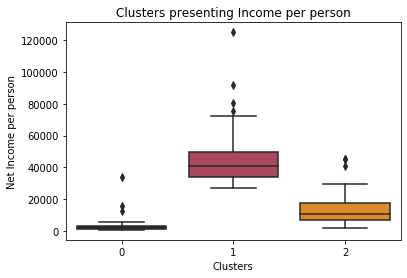

In [44]:
sns.boxplot(x = 'cluster_id',y = 'income', data = new1, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('Net Income per person')
plt.title('Clusters presenting Income per person')

**_From the above plot it can be concluded that the net income per person is very low in cluster 0 which includes the under developed countries and hence it can be concluded that since the income per person is low they are not able to afford the health benefits during any disastor that occurs as their finances cannot be covered, hence ngo needs to focus on these countries more._**

Text(0.5, 1.0, 'Clusters representing Life Expectancy')

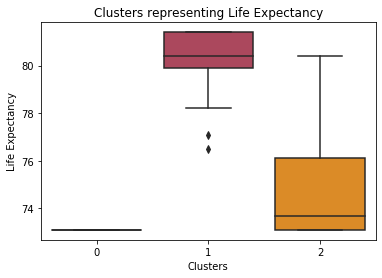

In [45]:
sns.boxplot(x = 'cluster_id', y = 'life_expec', data = new, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('Life Expectancy')
plt.title('Clusters representing Life Expectancy')

**_From the above plot we can observe that the average number of years a new born child would live if the current mortality patterns are to remain the same is very low in under developed countries which is cluster 0, which the ngo needs to focus on to increase._**

Text(0.5, 1.0, 'Clusters representing Total Fertility')

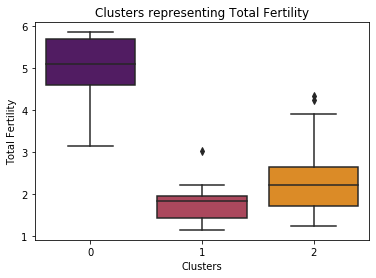

In [46]:
sns.boxplot(x = 'cluster_id', y = 'total_fer', data = new, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('Total Fertility')
plt.title('Clusters representing Total Fertility')

**_From the above plot we can analyse that the fertility rate is higher in under developed countries as compared to developed countries and they do not have the sources to provide basic needs hence the NGO needs to focus on reducing this._**

Text(0.5, 1.0, 'Clusters representing Inflation Rate')

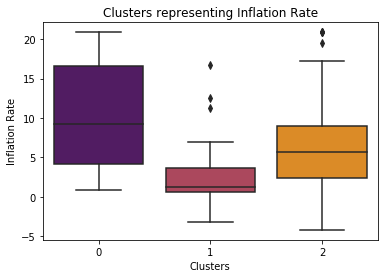

In [47]:
sns.boxplot(x = 'cluster_id', y = 'inflation', data = new, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('Inflation Rate')
plt.title('Clusters representing Inflation Rate')

**_From the plot we can analyse that the inflation rate is much higher in under developed countries as compared to developed countries._**

Text(0.5, 1.0, 'Clusters representing Imports')

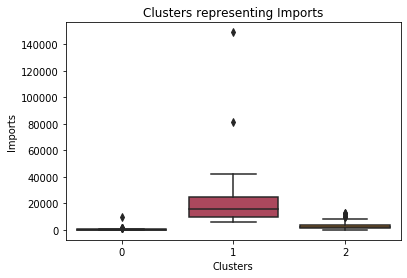

In [48]:
sns.boxplot(x = 'cluster_id', y = 'imports', data = new1, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('Imports')
plt.title('Clusters representing Imports')

**_While observing the imports of the countries it can be analysed that the under developed countries falling under cluster 0 are spending very less for their imports as well._**

## Step 5 - Cluster Profiling.

**_Cluster profiling is done to generate the descriptions of the clusters with reference to the variables that were used to input._**

Text(0.5, 1.0, 'Clusters presenting Child mortality rate and income')

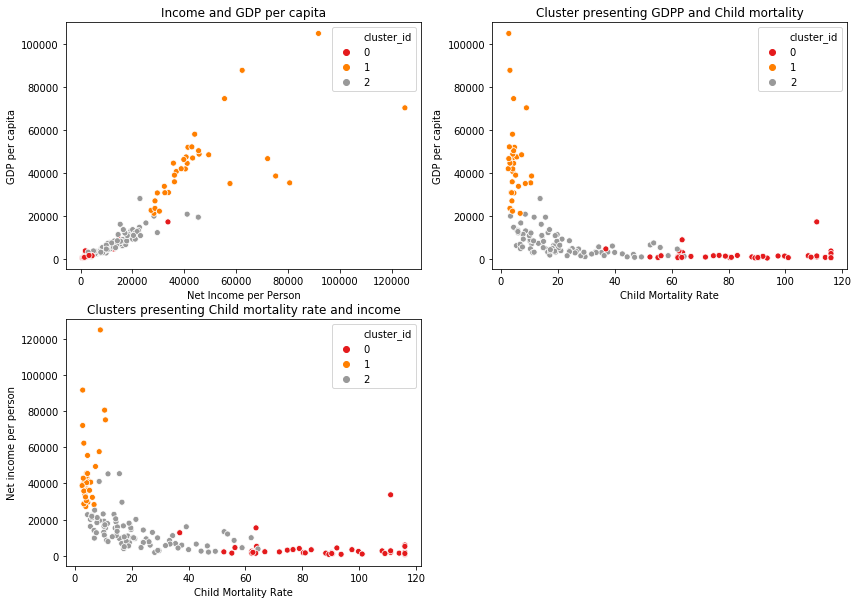

In [78]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1)
sns.scatterplot(x = 'income',y = 'gdpp', hue = 'cluster_id', data = new1, palette = 'Set1')
plt.xlabel('Net Income per Person')
plt.ylabel('GDP per capita')
plt.title('Income and GDP per capita')

plt.subplot(2,2,2)
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = new1, palette = 'Set1')
plt.xlabel('Child Mortality Rate')
plt.ylabel('GDP per capita')
plt.title('Cluster presenting GDPP and Child mortality')

plt.subplot(2,2,3)
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = new1, palette = 'Set1')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Net income per person')
plt.title('Clusters presenting Child mortality rate and income')

**_After performing cluster profiling, it can be observed that we have mainly three clusters in the model namely._**
1. Cluster 0 - Under developed countries which the NGO needs to focus on for providing any kind of relief during disasters or natural calamities.
2. Cluster 1 - Developed countries which do not require any help.
3. Cluster 2 - Developing countries which can also be ignored by the NGO as they do not require as much aids as compared to under developed countries.

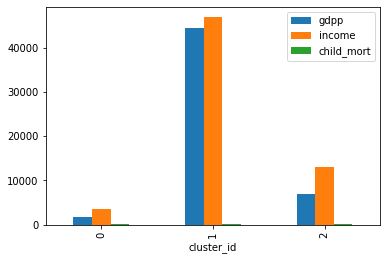

In [52]:
new1[['gdpp','income','child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind= 'bar')

**_From the above bar plot after cluster profiling we can analyse that the countries falling under cluster 0 have low gdpp, low net income per person and high child mortality rate._**

**_Hence we identified the clusters after cluster profiling as under developed and developed countries we can rename the cluster labels._**

In [83]:
new1['cluster_id'].replace(0, 'Under-Developed Countries', inplace = True)
new1['cluster_id'].replace(1, 'Developed Countries', inplace = True)
new1['cluster_id'].replace(2, 'Developing Countries', inplace = True)
new1.head()

,country,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer,cluster_id,cluster_label
0,Afghanistan,553,90.2,1610,55.30,41.9174,248.297,9.44,73.1,5.820,Under-Developed Countries,0
1,Albania,4090,16.6,9930,1145.20,267.8950,1987.740,4.49,76.3,1.650,Developing Countries,0
2,Algeria,4460,27.3,12900,1712.64,185.9820,1400.440,16.10,76.5,2.890,Developing Countries,0
3,Angola,3530,116.0,5900,2199.19,100.6050,1514.370,20.87,73.1,5.861,Under-Developed Countries,0
4,Antigua and Barbuda,12200,10.3,19100,5551.00,735.6600,7185.800,1.44,76.8,2.130,Developing Countries,0


**_Top 5 countries which needs the NGO's help._**

In [84]:
new1[new1['cluster_id']=='Under-Developed Countries'].sort_values(by= ['gdpp','child_mort','income'], ascending = True)

,country,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer,cluster_id,cluster_label
26,Burundi,231,93.6,764,20.6052,26.7960,90.552,12.300,73.1,5.861,Under-Developed Countries,0
88,Liberia,327,89.3,700,62.4570,38.5860,302.802,5.470,73.1,5.020,Under-Developed Countries,0
37,"Congo, Dem. Rep.",334,116.0,609,137.2740,26.4194,165.664,20.800,73.1,5.861,Under-Developed Countries,0
112,Niger,348,116.0,814,77.2560,17.9568,170.868,2.550,73.1,5.861,Under-Developed Countries,0
132,Sierra Leone,399,116.0,1220,67.0320,52.2690,137.655,17.200,73.1,5.200,Under-Developed Countries,0
93,Madagascar,413,62.2,1390,103.2500,15.5701,177.590,8.790,73.1,4.600,Under-Developed Countries,0
106,Mozambique,419,101.0,918,131.9850,21.8299,193.578,7.640,73.1,5.560,Under-Developed Countries,0
31,Central African Republic,446,116.0,888,52.6280,17.7508,118.190,2.010,73.1,5.210,Under-Developed Countries,0
94,Malawi,459,90.5,1030,104.6520,30.2481,160.191,12.100,73.1,5.310,Under-Developed Countries,0
50,Eritrea,482,55.2,1420,23.0878,12.8212,112.306,11.600,73.1,4.610,Under-Developed Countries,0


**_After performing the K means clustering for the NGO to help find out in which areas and which countries it needs to provide aid during disasters and natural calamities, we came to the final conclusion that the following 5 countries need the maximum aid:_**
1. Burundi.
2. Liberia.
3. Congo. Demo. Rep.
4. Niger.
5. Sierra Leone.

**_The NGO run its operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes for these countries._**

**_The areas in which these coutries need aid are as follows:_**
1. They need help in decreasing their child mortality rate, which seems to be high.
2. As well the health spending per capita of these countries is less which can be considered as one of the reasons as to the less health facilities and increased child mortality rate as well less life expectancy, since they are not able to decrease the child mortality rate the life expectancy cannot be increased.
3. The inflation rate in these countries is high which can be concluded as to their less spending on health facilities as the citizens do not have enough finances to cover during such calamities or other issues as the net income per person is low as well.

# Heirarchical Clustering

**_Hierarchical Clustering starts by treating each observation as a separate cluster, then the following two steps are repeated:_**
1. Identify the two clusters that are closest to each other.
2. Merge the two most similar clusters.

**_This process continues until all clusters are merged together._**

In [54]:
scaledf.head()

,gdpp,child_mort,income,exports,health,income,inflation,life_expec,total_fer
0,-0.679180,1.479341,-0.808245,-0.411011,-0.565040,-0.432276,0.394438,-0.754360,2.016421
1,-0.485623,-0.559029,-0.375369,-0.350191,-0.439218,-0.313677,-0.383226,0.337246,-0.880535
2,-0.465376,-0.262690,-0.220844,-0.318526,-0.484826,-0.353720,1.440750,0.405471,-0.019090
3,-0.516268,2.193878,-0.585043,-0.291375,-0.532363,-0.345953,2.190136,-0.754360,2.044904
4,-0.041817,-0.733509,0.101732,-0.104331,-0.178771,0.040735,-0.862393,0.507809,-0.547072


In [55]:
new1.head()

,country,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer,cluster_id
0,Afghanistan,553,90.2,1610,55.30,41.9174,248.297,9.44,73.1,5.820,0
1,Albania,4090,16.6,9930,1145.20,267.8950,1987.740,4.49,76.3,1.650,2
2,Algeria,4460,27.3,12900,1712.64,185.9820,1400.440,16.10,76.5,2.890,2
3,Angola,3530,116.0,5900,2199.19,100.6050,1514.370,20.87,73.1,5.861,0
4,Antigua and Barbuda,12200,10.3,19100,5551.00,735.6600,7185.800,1.44,76.8,2.130,2



## Single Linkage

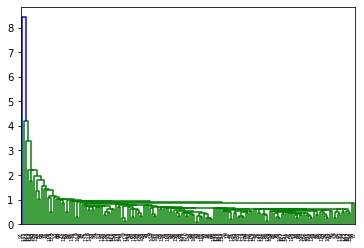

In [56]:
h1 = linkage(scaledf, method = 'single', metric = 'euclidean')
dendrogram(h1)
plt.show()

**_After performing the single linkage it is difficult to analyse the optimal number of clusters as the dendrogram is not structured properly hence we need to perform the complete linkage._**

## Complete Linkage

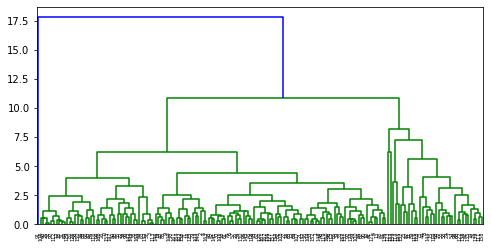

In [57]:
h2 = linkage(scaledf, method = 'complete', metric = 'euclidean')
plt.figure(figsize = (8,4))
dendrogram(h2)
plt.show()

**_The complete linkage produces a proper tree structure which helps us to identify the optimal number of clusters which is 3._**

In [58]:
cluster_label = cut_tree(h2, n_clusters = 3).reshape(-1, )
cluster_label

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

**_Assigning the cluster labels._**

In [59]:
new1['cluster_label'] = cluster_label
new1.head()

,country,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer,cluster_id,cluster_label
0,Afghanistan,553,90.2,1610,55.30,41.9174,248.297,9.44,73.1,5.820,0,0
1,Albania,4090,16.6,9930,1145.20,267.8950,1987.740,4.49,76.3,1.650,2,0
2,Algeria,4460,27.3,12900,1712.64,185.9820,1400.440,16.10,76.5,2.890,2,0
3,Angola,3530,116.0,5900,2199.19,100.6050,1514.370,20.87,73.1,5.861,0,0
4,Antigua and Barbuda,12200,10.3,19100,5551.00,735.6600,7185.800,1.44,76.8,2.130,2,0


In [72]:
new1['cluster_label'].value_counts()

0    130
1     36
2      1
Name: cluster_label, dtype: int64

**_Visualizing the plots._**

Text(0.5, 1.0, 'Clusters presenting GDPP')

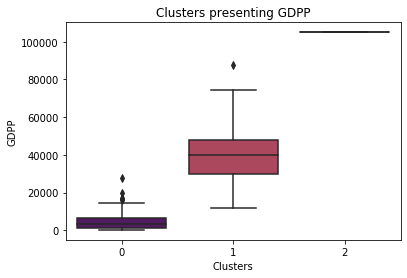

In [60]:
sns.boxplot(x = 'cluster_label', y = 'gdpp', data = new1, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('GDPP')
plt.title('Clusters presenting GDPP')

**_From above plot we can analyse that the cluster 0 includes the under developed countries as its GDPP is below 20000 and cluster 1 includes developed as well as developing countries as cluster 2 just has 1 country in it._**

Text(0.5, 1.0, 'Clusters presenting income')

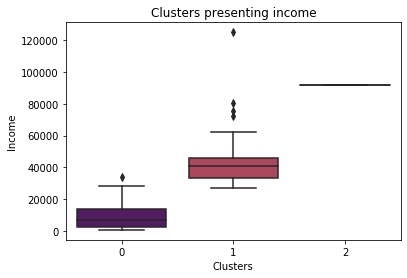

In [61]:
sns.boxplot(x = 'cluster_label', y = 'income', data = new1, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('Income')
plt.title('Clusters presenting income')

**_In the above cluster presentation it can be analysed that the cluster 0 are under developed countries as the net income per person is below 20000, and this can be considered as one of the reasons why these countries suffer during disasters and natural calamities as their citizens are not able to afford the health facilities which leads to increased child mortality rate and less life expectancy._**

Text(0.5, 1.0, 'Clusters presenting Child Mortality')

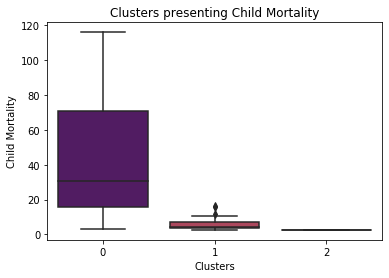

In [62]:
sns.boxplot(x = 'cluster_label',y = 'child_mort', data = new1, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('Child Mortality')
plt.title('Clusters presenting Child Mortality')

**_In visualising clusters presenting child mortality it can be analysed that the cluster 0 has the highest child mortality which incdicates of the countries which are in need of the help of NGO._**

Text(0.5, 1.0, 'Clusters presenting Health')

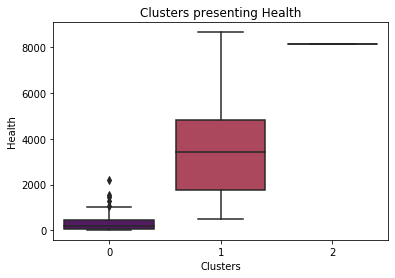

In [63]:
sns.boxplot(x = 'cluster_label',y = 'health', data = new1, palette = 'inferno')
plt.xlabel('Clusters')
plt.ylabel('Health')
plt.title('Clusters presenting Health')

### Cluster Profiling

Text(0.5, 1.0, 'Clusters presenting Child Mortality and GDPP')

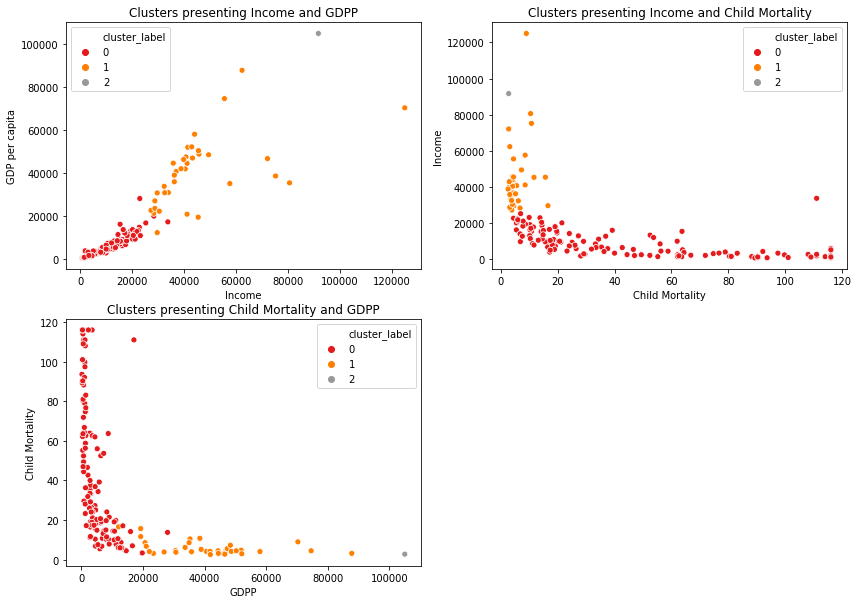

In [79]:
plt.figure(figsize = (14,10))
plt.subplot(2,2,1)
sns.scatterplot(x = 'income',y = 'gdpp', hue = 'cluster_label', data = new1, palette = 'Set1')
plt.xlabel('Income')
plt.ylabel('GDP per capita')
plt.title('Clusters presenting Income and GDPP')

plt.subplot(2,2,2)
sns.scatterplot(x = 'child_mort',y = 'income', hue = 'cluster_label', data = new1, palette = 'Set1')
plt.xlabel('Child Mortality')
plt.ylabel('Income')
plt.title('Clusters presenting Income and Child Mortality')

plt.subplot(2,2,3)
sns.scatterplot(x = 'gdpp',y = 'child_mort', hue = 'cluster_label', data = new1, palette = 'Set1')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.title('Clusters presenting Child Mortality and GDPP')

**_After cluster profiling we can observe that there are mainly 2 clusters in this which are:._**
1. Cluster 0 - The under developed countries which are denoted by red dots.
2. Cluster 1 - The developed and developing countries which are denoted by orange dots.

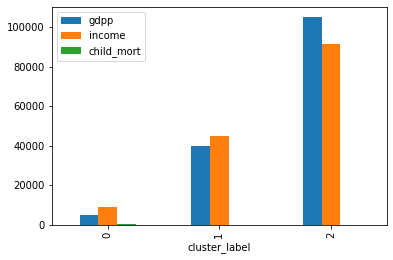

In [67]:
new1[['gdpp','income','child_mort','cluster_label']].groupby('cluster_label').mean().plot(kind= 'bar')

**_From the above bar plot it can be analysed that the cluster 0 comes under under developed countries and has low gdpp low income and high child mortality rate._**

**_After performing cluster profiling we identified the clusters as developed and under developed counties hence renaming the values accordingly._**

In [85]:
new1['cluster_label'].replace(0, 'Under-Developed Countries', inplace = True)
new1['cluster_label'].replace(1, 'Developed and Developing Countries', inplace = True)
new1.head()

,country,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer,cluster_id,cluster_label
0,Afghanistan,553,90.2,1610,55.30,41.9174,248.297,9.44,73.1,5.820,Under-Developed Countries,Under-Developed Countries
1,Albania,4090,16.6,9930,1145.20,267.8950,1987.740,4.49,76.3,1.650,Developing Countries,Under-Developed Countries
2,Algeria,4460,27.3,12900,1712.64,185.9820,1400.440,16.10,76.5,2.890,Developing Countries,Under-Developed Countries
3,Angola,3530,116.0,5900,2199.19,100.6050,1514.370,20.87,73.1,5.861,Under-Developed Countries,Under-Developed Countries
4,Antigua and Barbuda,12200,10.3,19100,5551.00,735.6600,7185.800,1.44,76.8,2.130,Developing Countries,Under-Developed Countries


**_Top 5 countries in need of help from NGO._**

In [86]:
new1[new1['cluster_label']=='Under-Developed Countries'].sort_values(by= ['gdpp','child_mort','income'], ascending = True)

,country,gdpp,child_mort,income,exports,health,imports,inflation,life_expec,total_fer,cluster_id,cluster_label
26,Burundi,231,93.6,764,20.6052,26.7960,90.552,12.300,73.1,5.861,Under-Developed Countries,Under-Developed Countries
88,Liberia,327,89.3,700,62.4570,38.5860,302.802,5.470,73.1,5.020,Under-Developed Countries,Under-Developed Countries
37,"Congo, Dem. Rep.",334,116.0,609,137.2740,26.4194,165.664,20.800,73.1,5.861,Under-Developed Countries,Under-Developed Countries
112,Niger,348,116.0,814,77.2560,17.9568,170.868,2.550,73.1,5.861,Under-Developed Countries,Under-Developed Countries
132,Sierra Leone,399,116.0,1220,67.0320,52.2690,137.655,17.200,73.1,5.200,Under-Developed Countries,Under-Developed Countries
...,...,...,...,...,...,...,...,...,...,...,...,...
13,Barbados,16000,14.2,15300,6320.0000,1275.2000,7792.000,0.321,76.7,1.780,Developing Countries,Under-Developed Countries
134,Slovak Republic,16600,7.0,25200,12665.8000,1459.1400,12914.800,0.485,75.5,1.430,Developing Countries,Under-Developed Countries
49,Equatorial Guinea,17100,111.0,33700,14671.8000,766.0800,10071.900,20.870,73.1,5.210,Under-Developed Countries,Under-Developed Countries
43,Czech Republic,19800,3.4,28300,13068.0000,1560.2400,12454.200,-1.430,77.5,1.510,Developing Countries,Under-Developed Countries


**_After performing the Heirarchical clustering for the NGO to help find out in which areas and which countries it needs to provide aid during disasters and natural calamities, we came to the final conclusion that the following 5 countries need the maximum aid:_**
1. Burundi.
2. Liberia.
3. Congo. Demo. Rep.
4. Niger.
5. Sierra Leone.

## Step 6 - Conclusion and Recommendations

**_After performing both the clustering methods for the NGO we came to the conclusion that following 5 countries are in the maximum need of ais from NGO and it can start providing its operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes for these countries:_**
1. Burundi.
2. Liberia.
3. Congo. Demo. Rep.
4. Niger.
5. Sierra Leone.


**_We can recommend to use the Kmeans clustering modelling for the NGO to identify the countries in need of help as Kmeans clustering clearly identifies the three categories of countries and._**

**_Recommendations for the areas in which these coutries need aid are as follows:_**
1. These countries require help in decreasing their child mortality rate, which seems to be high, hence the NGO can provide health facilities to these countries which may help in reducing the child mortality rate, the NGO needs to focus more towards reducing the child mortality as it can be identified as the main issue faced by these countries, hence they can provide funding and create operational camps for the awareness towards the child mortality and to care for the health of children.
2. As well the health spending per capita of these countries is less which can be considered as one of the reasons for less health facilities and increased child mortality rate as well less life expectancy, since they are not able to decrease the child mortality rate the life expectancy cannot be increased, hence the NGO can provide funding aid towards healthcare of these countries.
3. The inflation rate in these countries is high which can be concluded as to their less spending on health facilities as the citizens do not have enough finances to cover during natural disasters, hence the NGO can work with these countries in providing proper jobs for the citizens of these countries.
4. The total fertility rate is high, hence the NGO needs to organize awareness for the health risks of the women as well they can create awareness camps for further educating citizens regarding child health.
5. The net income per person is also very low for these countries hence to help aid in poverty the NGO can work with these countries in order to provide them with a bit more paying jobs which can as well help in aiding other health care issues as well.